# Load dataset & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #描画用ライブラリ

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza.csv"
exp_dir = "datasets/infuluenza/vecLSTM_noRh/"

df = pd.read_csv(data_path)

In [2]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

,Alltime,Time,region,regnames,Longitude,Latitude,Altitude,Year,Month,Week,Flucases,Holiday,Tempave,Tempmin,Tempmax,Rh
12480,12481,1,13,Tokyo,35.689185,139.691648,34.9,2000,1,1,818,2,9.528571,6.371429,13.385714,50.571429
12481,12482,2,13,Tokyo,35.689185,139.691648,34.9,2000,1,2,1167,3,8.642857,5.457143,12.000000,61.142857
12482,12483,3,13,Tokyo,35.689185,139.691648,34.9,2000,1,3,2562,2,6.828571,4.171429,9.500000,56.000000
12483,12484,4,13,Tokyo,35.689185,139.691648,34.9,2000,1,4,3781,2,5.342857,1.542857,9.400000,42.000000
12484,12485,5,13,Tokyo,35.689185,139.691648,34.9,2000,1,5,3903,2,7.214286,3.171429,11.585714,38.714286


In [3]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [4]:
columns = ["Flucases","Tempave", "Rh", "Holiday"]

all_data = df_tokyo[columns]

In [5]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

In [6]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [7]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave"]]
test_xs_df = test_df["Holiday"]

# Dataset and DataLoader

In [8]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [9]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza.csv"
exp_dir = "datasets/infuluenza/vecLSTM_noRh/"
data_dir = "datasets/infuluenza/vecLSTM_noRh/"

In [10]:
seq_length = 13

train_Xs = np.load(data_dir + "train_Xs_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_ys_" + str(seq_length) + "w.npy")
val_Xs = np.load(data_dir + "val_Xs_" + str(seq_length) + "w.npy")
val_ys = np.load(data_dir + "val_ys_" + str(seq_length) + "w.npy")

In [11]:
trn_xs_tensor = torch.Tensor(train_Xs)
trn_ys_tensor = torch.Tensor(train_ys)

val_xs_tensor = torch.Tensor(val_Xs)
val_ys_tensor = torch.Tensor(val_ys)

In [12]:
train_Xs.shape, train_ys.shape, val_Xs.shape, val_ys.shape

((613, 13, 3), (613, 1, 3), (154, 13, 3), (154, 1, 3))

In [13]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(exp_dir + 'std_scaler.joblib')

In [14]:
trn_xs_tensor.shape, trn_ys_tensor.shape, val_xs_tensor.shape, val_ys_tensor.shape

(torch.Size([613, 13, 3]),
 torch.Size([613, 1, 3]),
 torch.Size([154, 13, 3]),
 torch.Size([154, 1, 3]))

In [15]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [16]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
1 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
2 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
3 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
4 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
5 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
6 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
7 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
8 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
9 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
10 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
11 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
12 torch.Size([13, 13, 3]) torch.Size([13, 1, 3])


In [17]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
1 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
2 torch.Size([50, 13, 3]) torch.Size([50, 1, 3])
3 torch.Size([4, 13, 3]) torch.Size([4, 1, 3])


# LSTM model

In [18]:
class cLSTM(nn.Module):
    def __init__(self, input_size = 4, hidden_size=32, cond_size = 1, output_size=4, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.cond_size = cond_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.cfc1 = nn.Linear(self.cond_size, int(self.hidden_size / 2))
        self.cfc2 = nn.Linear(int(self.hidden_size / 2), int(self.hidden_size / 4))
        
        self.fc1 = nn.Linear(int(self.hidden_size / 4) + self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x, cin):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
        
        ch1 = self.relu(self.cfc1(cin))
        ch2 = self.cfc2(ch1)
        
        h_list = [outs, ch2]
        h1 = torch.cat(h_list, dim=1)
        h2 = self.relu(self.fc1(h1))
        h3 = self.fc2(h2)
        
        y_list = [self.relu(h3[:,0:1]), h3[:,1:2]]
        ys = torch.cat(y_list, dim=1)

        return ys

In [19]:
model = cLSTM(input_size = 3, hidden_size = 32, cond_size = 1, output_size = 2, num_layers = 1)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Prediction

In [20]:
batch_0x = list(trn_loader)[0][0]
batch_0c = list(trn_loader)[0][1]

In [21]:
batch_0x.shape, batch_0c.shape

(torch.Size([50, 13, 3]), torch.Size([50, 1, 3]))

In [22]:
batch_0c = torch.reshape(batch_0c[:,:,-1], (batch_0c.shape[0], 1))

In [23]:
batch_0c.shape

torch.Size([50, 1])

In [24]:
preds = model(batch_0x, batch_0c)

In [25]:
preds.shape

torch.Size([50, 2])

## Train

In [26]:
model.cuda()

cLSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(3, 32, dropout=0.2)
  (cfc1): Linear(in_features=1, out_features=16, bias=True)
  (cfc2): Linear(in_features=16, out_features=8, bias=True)
  (fc1): Linear(in_features=40, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [27]:
criterion = nn.MSELoss(reduction='none').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [28]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()
                input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))

            preds = model(inputs, input_c)
            true_ys = torch.reshape(trues[:,:,0:2], (trues.shape[0], 2))
            loss = criterion(preds, true_ys).mean(dim=0).mean()
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [29]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        optimizer.zero_grad()
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:2], (trues.shape[0], 2))
        loss = criterion(preds, true_ys).mean(dim=0).mean()
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.953332965190594 Val loss:  0.5806393176317215
epoch:  1 Train loss:  0.8682318238111643 Val loss:  0.5436492040753365
epoch:  2 Train loss:  0.8045363334509043 Val loss:  0.45749203860759735
epoch:  3 Train loss:  0.6812380460592417 Val loss:  0.3258736580610275
epoch:  4 Train loss:  0.4510232238815381 Val loss:  0.18094296008348465
epoch:  5 Train loss:  0.28065203760678953 Val loss:  0.12298746034502983
epoch:  6 Train loss:  0.2456516491679045 Val loss:  0.11345375888049603
epoch:  7 Train loss:  0.20118198486474845 Val loss:  0.10917766764760017
epoch:  8 Train loss:  0.1441769078373909 Val loss:  0.10746822692453861
epoch:  9 Train loss:  0.12117477105214046 Val loss:  0.10784413479268551
epoch:  10 Train loss:  0.11502501397178723 Val loss:  0.10013574548065662
epoch:  11 Train loss:  0.1105083364706773 Val loss:  0.09341214597225189
epoch:  12 Train loss:  0.09822312369942665 Val loss:  0.10339459776878357
epoch:  13 Train loss:  0.11356949634276904 Val

epoch:  111 Train loss:  0.087424180828608 Val loss:  0.05992981977760792
epoch:  112 Train loss:  0.09292490465136674 Val loss:  0.060397171415388584
epoch:  113 Train loss:  0.08707912122974029 Val loss:  0.06199587229639292
epoch:  114 Train loss:  0.08615482713167484 Val loss:  0.059821248054504395
epoch:  115 Train loss:  0.08453403413295746 Val loss:  0.060924384742975235
epoch:  116 Train loss:  0.08492798959979644 Val loss:  0.05918044690042734
epoch:  117 Train loss:  0.08542916579888417 Val loss:  0.059355536475777626
epoch:  118 Train loss:  0.08539345459296153 Val loss:  0.062855145893991
epoch:  119 Train loss:  0.08317627070041803 Val loss:  0.0598631277680397
epoch:  120 Train loss:  0.08619278955918092 Val loss:  0.062259258702397346
epoch:  121 Train loss:  0.08589979175191659 Val loss:  0.06299873348325491
epoch:  122 Train loss:  0.09197803472097103 Val loss:  0.06182557065039873
epoch:  123 Train loss:  0.09589732925479229 Val loss:  0.06572831515222788
epoch:  124 

epoch:  226 Train loss:  0.08219740253228408 Val loss:  0.05653877928853035
epoch:  227 Train loss:  0.08214832899662164 Val loss:  0.053997479379177094
epoch:  228 Train loss:  0.09228952630208088 Val loss:  0.05521807121112943
epoch:  229 Train loss:  0.0811198832323918 Val loss:  0.057910787872970104
epoch:  230 Train loss:  0.08369844320874947 Val loss:  0.05549823585897684
epoch:  231 Train loss:  0.08124233667667095 Val loss:  0.056082988157868385
epoch:  232 Train loss:  0.08237620070576668 Val loss:  0.05543664703145623
epoch:  233 Train loss:  0.0815636429649133 Val loss:  0.0619399594143033
epoch:  234 Train loss:  0.08097178030472535 Val loss:  0.059005944058299065
epoch:  235 Train loss:  0.08237618781053103 Val loss:  0.05672633368521929
epoch:  236 Train loss:  0.08187752704207714 Val loss:  0.053560353349894285
epoch:  237 Train loss:  0.07991872985775654 Val loss:  0.05572941713035107
epoch:  238 Train loss:  0.0789050726363292 Val loss:  0.057541185058653355
epoch:  23

epoch:  335 Train loss:  0.07817172488340965 Val loss:  0.057257658801972866
epoch:  336 Train loss:  0.07721515458363754 Val loss:  0.05169734125956893
epoch:  337 Train loss:  0.07571582410197991 Val loss:  0.05320464074611664
epoch:  338 Train loss:  0.07520730908100422 Val loss:  0.057230657897889614
epoch:  339 Train loss:  0.08237321044390018 Val loss:  0.05604251753538847
epoch:  340 Train loss:  0.07862626646573727 Val loss:  0.057347141206264496
epoch:  341 Train loss:  0.07935687011251083 Val loss:  0.052993969060480595
epoch:  342 Train loss:  0.08178306772158696 Val loss:  0.05392813729122281
epoch:  343 Train loss:  0.0774259719137962 Val loss:  0.053869209717959166
epoch:  344 Train loss:  0.07760007765430671 Val loss:  0.05401240848004818
epoch:  345 Train loss:  0.0788011450607043 Val loss:  0.05434006033465266
epoch:  346 Train loss:  0.07808049367024349 Val loss:  0.05417677015066147
epoch:  347 Train loss:  0.07488891081168102 Val loss:  0.053011889569461346
epoch:  

epoch:  447 Train loss:  0.07177387980314401 Val loss:  0.05314310407266021
epoch:  448 Train loss:  0.07284663818203486 Val loss:  0.053547239396721125
epoch:  449 Train loss:  0.07280268577428964 Val loss:  0.05302879400551319
epoch:  450 Train loss:  0.07080062249532112 Val loss:  0.0573526481166482
epoch:  451 Train loss:  0.07324552048857395 Val loss:  0.054144762456417084
epoch:  452 Train loss:  0.0707095073392758 Val loss:  0.054339502938091755
epoch:  453 Train loss:  0.06960981998306054 Val loss:  0.05395422875881195
epoch:  454 Train loss:  0.07649375842167781 Val loss:  0.05470634950324893
epoch:  455 Train loss:  0.07444016807354413 Val loss:  0.05526218190789223
epoch:  456 Train loss:  0.07538475554723006 Val loss:  0.05739893624559045
epoch:  457 Train loss:  0.06931697591566123 Val loss:  0.054072458762675524
epoch:  458 Train loss:  0.0706119118974759 Val loss:  0.056998755782842636
epoch:  459 Train loss:  0.07670082123233722 Val loss:  0.05438617803156376
epoch:  46

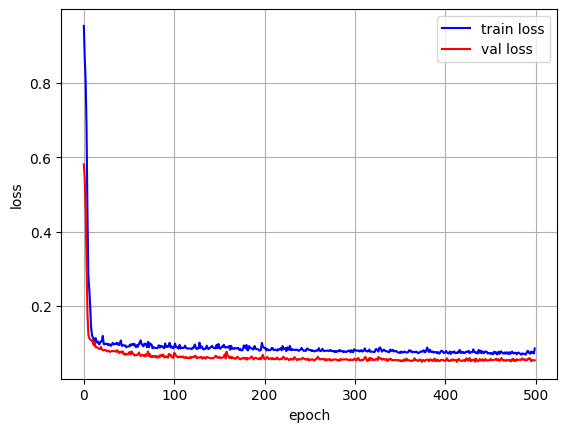

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [31]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(413, 0.049083682242780924)

In [32]:
save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"

model = torch.load(save_model_path)

### Scatter plot

In [33]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:2], (trues.shape[0], 2))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [34]:
np.array(trues_list).shape, np.array(preds_list).shape

((613, 1, 2), (613, 1, 2))

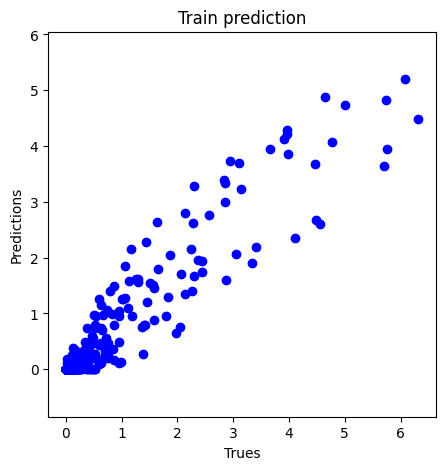

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする
plt.show()

In [36]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:2], (trues.shape[0], 2))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153


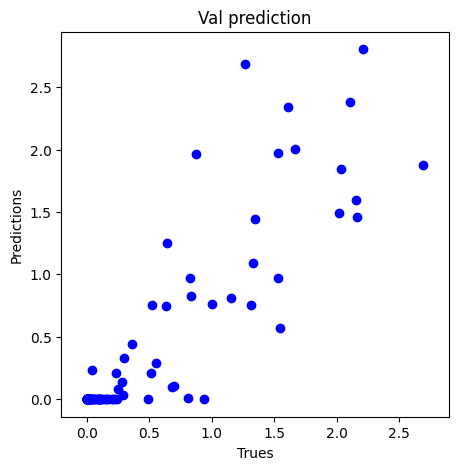

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする

plt.show()

## Test prediction

In [38]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(exp_dir + "train_np.npy")
test_np = np.load(exp_dir + "test_np.npy")

In [39]:
train_np.shape, test_np.shape

((780, 3), (260, 3))

In [40]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

In [41]:
test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [42]:
test_scaled_ys = std_scaler.transform(test_np[:,1:2])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
test_scaled_ys.shape, test_scaled_ts.reshape(-1,1).shape, test_np[:,-1].shape

((260, 1), (260, 1), (260,))

In [44]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

In [45]:
test_all_np.shape

(260, 3)

In [46]:
test_np[:,-1].shape, test_scaled_ts.shape, test_scaled_ys.shape, test_np.shape

((260,), (260,), (260, 1), (260, 3))

### 1. Prediction based on results from 40 days ago

In [47]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [48]:
test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [49]:
tst_xs_tensor = torch.Tensor(test_Xs)
tst_ys_tensor = torch.Tensor(test_ys)

In [50]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [51]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:2], (trues.shape[0], 2))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246


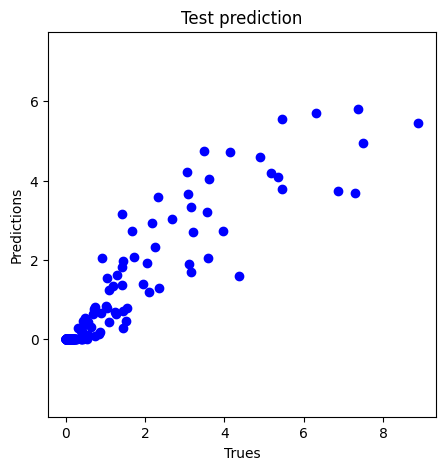

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画
plt.gca().set_aspect('equal', adjustable='datalim')

plt.show()

In [53]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [54]:
tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

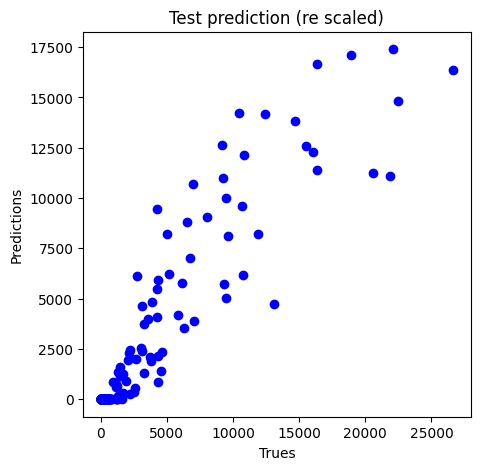

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [56]:
tst_preds.shape

(247, 1)

In [57]:
train_n

780

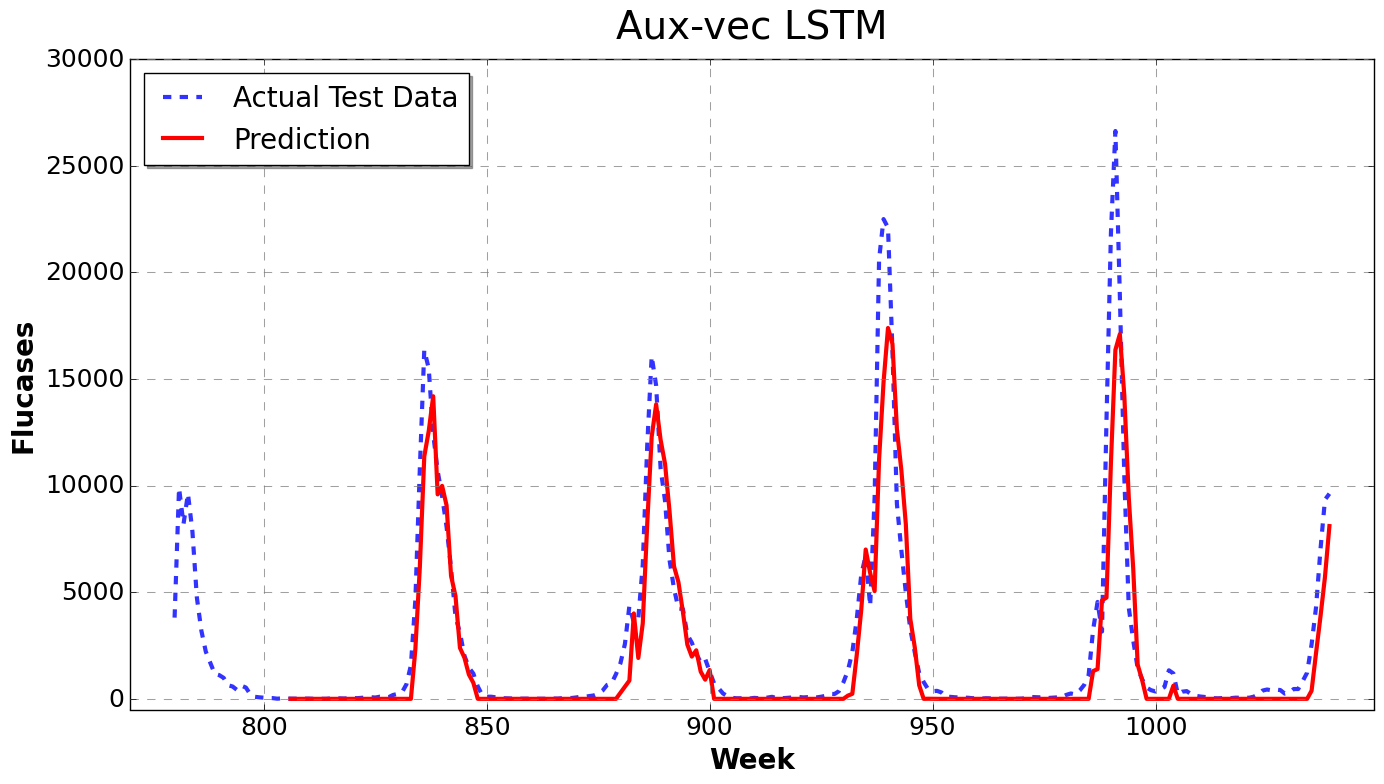

In [58]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=3, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length+seq_length:], tst_preds[seq_length:], label="Prediction", linestyle='-', linewidth=3, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Aux-vec LSTM", fontsize=28, y=1.02)

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
#plt.savefig("vec_cLSTM.jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [59]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [60]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 3222031.8473832086.
RMSE : 1795.0019073480698.
MAE : 795.4329161284423.
R2 : 0.8475724180005315.
pearson : 0.9315421880070991 1.2590047513954181e-109


In [61]:
reg_metric(test_np[seq_length*4:,0], tst_preds[seq_length*3:,0], "Flucases")

Flucases
MSE : 3819175.3716521757.
RMSE : 1954.2710588995008.
MAE : 924.6871648256022.
R2 : 0.8416153024224471.
pearson : 0.9288748150589143 8.335244055872364e-91
